# Fiche n°6 : Analyse énergétique d’un mouvement

L’évolution de la position d’un volant de badminton est étudiée au cours du temps dans le but d’illustrer l’existence de frottements avec l’air par une approche énergétique. Le volant est lancé avec une vitesse initiale importante avec un angle de 45° par rapport à l’horizontale. A partir d’une chronophotographie, les positions du volant en fonction du temps sont saisies afin de faire calculer la vitesse en fonction du temps, puis celles des diverses formes d’énergie (cinétique, potentielle et mécanique). 

**Capacité numérique** : Utiliser un langage de programmation pour effectuer le bilan énergétique d’un système en mouvement

## 1. Distance parcourue par le volant en fonction du temps

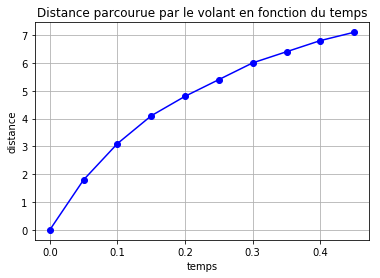

In [1]:
import numpy as np
import matplotlib.pyplot as plt

d=np.array([0,1.8,3.1,4.1,4.8,5.4,6,6.4,6.8,7.1])
t=0.05*np.arange(10)

plt.plot(t,d,'bo-',label='distance')
plt.grid()
plt.xlabel("temps")
plt.ylabel("distance")
plt.title("Distance parcourue par le volant en fonction du temps")
plt.show()

## 2. Modèle de la force subie par le volant

In [0]:
vl=[]
m=np.arange(len(t)-2)
for i in m :
    v=(d[i+2]-d[i])/(t[i+2]-t[i])
    vl.append(v)

al=[]
m=np.arange(len(t)-4)
for i in m :
    a=(vl[i+2]-vl[i])/(t[i+2]-t[i])
    al.append(a)


[-8.00227015 45.69807037]


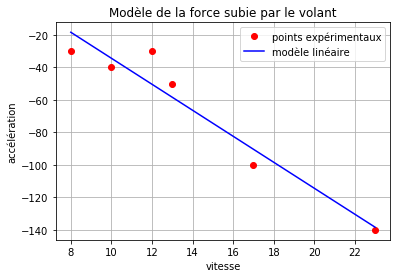

In [0]:
v0=vl[1:-1] # on enlève le premier et le dernier termes. 
v1=np.array(v0)
mod=np.polyfit(v1,al,1)
model=mod[0]*v1+mod[1]
print(mod)
plt.plot(v1,al,'ro',label="points expérimentaux")
plt.legend()
plt.plot(v1,model,'b-',label="modèle linéaire")
plt.legend()
plt.grid()
plt.xlabel("vitesse")
plt.ylabel("accélération")
plt.title("Modèle de la force subie par le volant")
plt.show()

[ -0.25449771 -10.07091075]


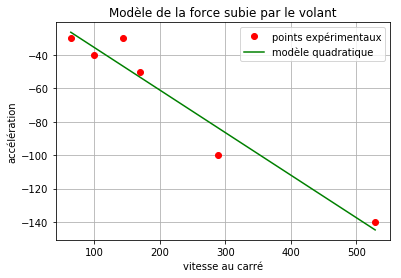

In [0]:
v0=vl[1:-1]
v1=np.array(v0)**2
mod2=np.polyfit(v1,al,1)
model2=mod2[0]*v1+mod2[1]
print(mod2)
plt.plot(v1,al,'ro',label="points expérimentaux")
plt.legend()
plt.plot(v1,model2,'g-',label="modèle quadratique")
plt.legend()
plt.grid()
plt.xlabel("vitesse au carré")
plt.ylabel("accélération")
plt.title("Modèle de la force subie par le volant")
plt.show()

## 3. Variation des énergie cinétique, potentielle et mécanique

**Remarque** : il faut prendre garde à bien faire correspondre les valeurs de distance et de vitesse calculées (il faut ainsi décaler la liste des distances (c’est le sens de la commande dr=d[ 1:-1] qui enlève le premier et le dernier termes de la liste d). 

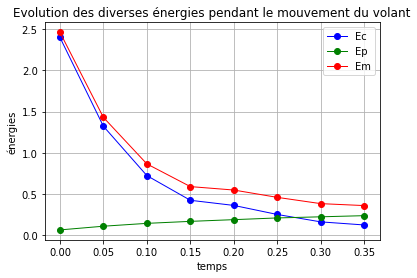

In [0]:
vll=np.array(vl)
ec=0.0025*vll**2
d2=d[1:-1]                   # on enlève le premier et le dernier termes. 
ep=0.005*9.8*d2*np.sqrt(2)/2 # ici, le facteur sqrt(2)/2 provient de la projection de la trajectoire sur l'axe vertical : 
                             # pendant la première phase du mouvement, la direction reste constante (la gravité ne joue pratiquement pas) et l'angle 
                             # de la trajectoire avec la verticale (pi/4) ne change pas. L'altitude z est donc d.sqrt(2)/2 où d est la distance parcourue
                             # depuis l'origine
em=ec+ep
t2=0.05*np.arange(8)

plt.plot(t2,ec,'bo-',lw=1,label='Ec')
plt.legend()
plt.plot(t2,ep,'go-',lw=1,label='Ep')
plt.legend()
plt.plot(t2,em,'ro-',lw=1,label='Em')
plt.legend()
plt.grid()
plt.xlabel("temps")
plt.ylabel("énergies")
plt.title("Evolution des diverses énergies pendant le mouvement du volant")
plt.show()

**Analyse** : L’énergie mécanique diminue au cours du temps. Elle n’est pas conservée ce qui peut s’interpréter par la présence de frottements avec une puissance non-nulle.

**Remarque** : dans le script fourni, deux cellules permettent de tester le type de force de frottement. Ces deux tests, qui visent à tracer la variation de vitesse en fonction de la vitesse ou de la vitesse au carré, permettent de montrer qu’avec si peu de points, il n’est pas possible de discriminer entre les deux modèles de frottement, même si le modèle quadratique (vraisemblablement le meilleur ici) semble légèrement plus satisfaisant d’un point de vue esthétique. Dans ces deux scripts, le problème du redimensionnement des listes de vitesse se pose ; pour que les accélérations correspondent aux vitesses calculées, il faut décaler le tableau des vitesses : c’est le sens des commandes v[1 :-1].